Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "" # put your full name here
COLLABORATORS = [] # list anyone you collaborated with on this workbook

---

## Lab 4: Visualization
**This lab was distributed Monday 9/23/2019 and should be completed by Monday 9/30/2019 at 11:59PM.**

Welcome to your fourth lab of the semester!<br>

This lab aims to get you started with visualization in Python.

## Setup

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
%matplotlib inline

## Question 1: Warmup
Let's start by looking at some example figures (your group will be assigned one of these four):<br>
1. [Overnight stays at US National Parks](http://jordan-vincent.com/night-under-the-stars)
1. [Most popular fields of study](https://flowingdata.com/2016/12/07/fields-of-study-ranked-over-past-few-decades/)
1. [Carbon emissions and oceans](https://www.nationalgeographic.com/environment/2019/06/see-the-drastic-toll-climate-change-is-taking-on-our-oceans/)
1. [Tracking Britain's use of coal](https://www.theguardian.com/environment/ng-interactive/2019/may/25/the-power-switch-tracking-britains-record-coal-free-run)

For links that contain more than one visualization, you can choose to comment on just one or multiple visualizations.

### Question 1.1
What does this visualization show? Is there a message that's being conveyed with the visualization? If so, what is it?

*Your answer here*

### Question 1.2
What do you like about this figure? What can be improved?

*Your answer here*

## Question 2: Understanding our data
The data from this lab comes from the Environmental Protection Agency (EPA). From the [daily air quality data tool](https://www.epa.gov/outdoor-air-quality-data/download-daily-data), we pulled PM2.5 data from 2019 for monitors in Alameda County. Let's take a look at the data in our data folder by running the cell below.

In [3]:
os.listdir('data')

['alameda_pm25_2019.csv']

### Question 2.1
Create a dataframe called `alameda_pm25` that contains the data from the .csv found in the 'data' folder.

In [4]:
alameda_pm25 = pd.read_csv("data/alameda_pm25_2019.csv")

In [5]:
alameda_pm25.head()

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2019,AQS,60010007,3,5.7,ug/m3 LC,24,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
1,01/02/2019,AQS,60010007,3,11.9,ug/m3 LC,50,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
2,01/03/2019,AQS,60010007,3,20.1,ug/m3 LC,68,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
3,01/04/2019,AQS,60010007,3,28.8,ug/m3 LC,86,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217
4,01/05/2019,AQS,60010007,3,11.2,ug/m3 LC,47,Livermore,1,100.0,88101,PM2.5 - Local Conditions,41860,"San Francisco-Oakland-Hayward, CA",6,California,1,Alameda,37.687526,-121.784217


### Question 2.2
Use `.describe()` to summarize the data in `alameda_pm25`.

In [6]:
alameda_pm25.describe()

,Site ID,POC,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,CBSA_CODE,STATE_CODE,COUNTY_CODE,SITE_LATITUDE,SITE_LONGITUDE
count,1.485000e+03,1485.0,1485.000000,1485.000000,1485.0,1485.0,1485.0,1485.0,1485.0,1485.0,1485.000000,1485.000000
mean,6.001001e+07,3.0,6.803300,27.821549,1.0,100.0,88101.0,41860.0,6.0,1.0,37.767333,-122.117801
std,2.605102e+00,0.0,3.888972,14.513812,0.0,0.0,0.0,0.0,0.0,0.0,0.062713,0.201093
min,6.001001e+07,3.0,0.000000,0.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.687526,-122.302741
25%,6.001001e+07,3.0,4.100000,17.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.701222,-122.282347
50%,6.001001e+07,3.0,6.000000,25.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.743065,-122.169935
75%,6.001001e+07,3.0,8.800000,37.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.814781,-121.903019
max,6.001002e+07,3.0,29.300000,87.000000,1.0,100.0,88101.0,41860.0,6.0,1.0,37.864767,-121.784217


You'll notice that the output of `.describe()` drops the "Date" column because it isn't a numeric type. Try running `.describe()` again, this time setting the argument `include = 'all'`.

In [7]:
alameda_pm25.describe(include = 'all')

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
count,1485,1485,1.485000e+03,1485.0,1485.000000,1485,1485.000000,1485,1485.0,1485.0,1485.0,1485,1485.0,1485,1485.0,1485,1485.0,1485,1485.000000,1485.000000
unique,251,2,NaN,NaN,NaN,1,NaN,6,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
top,03/02/2019,AirNow,NaN,NaN,NaN,ug/m3 LC,NaN,Oakland,NaN,NaN,NaN,PM2.5 - Local Conditions,NaN,"San Francisco-Oakland-Hayward, CA",NaN,California,NaN,Alameda,NaN,NaN
freq,6,947,NaN,NaN,NaN,1485,NaN,251,NaN,NaN,NaN,1485,NaN,1485,NaN,1485,NaN,1485,NaN,NaN
mean,NaN,NaN,6.001001e+07,3.0,6.803300,NaN,27.821549,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.767333,-122.117801
std,NaN,NaN,2.605102e+00,0.0,3.888972,NaN,14.513812,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.062713,0.201093
min,NaN,NaN,6.001001e+07,3.0,0.000000,NaN,0.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.687526,-122.302741
25%,NaN,NaN,6.001001e+07,3.0,4.100000,NaN,17.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.701222,-122.282347
50%,NaN,NaN,6.001001e+07,3.0,6.000000,NaN,25.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.743065,-122.169935
75%,NaN,NaN,6.001001e+07,3.0,8.800000,NaN,37.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.814781,-121.903019


Now, try converting the "Date" field to a `datetime` data type using `pd.to_datetime`. Then, re-run the `.describe` function, using the argument `include = all`. Does the output of `.describe` change when you do this? Why?

In [8]:
alameda_pm25["Date"] = pd.to_datetime(alameda_pm25["Date"])
alameda_pm25.describe(include = 'all')

,Date,Source,Site ID,POC,Daily Mean PM2.5 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
count,1485,1485,1.485000e+03,1485.0,1485.000000,1485,1485.000000,1485,1485.0,1485.0,1485.0,1485,1485.0,1485,1485.0,1485,1485.0,1485,1485.000000,1485.000000
unique,251,2,NaN,NaN,NaN,1,NaN,6,NaN,NaN,NaN,1,NaN,1,NaN,1,NaN,1,NaN,NaN
top,2019-08-09 00:00:00,AirNow,NaN,NaN,NaN,ug/m3 LC,NaN,Oakland,NaN,NaN,NaN,PM2.5 - Local Conditions,NaN,"San Francisco-Oakland-Hayward, CA",NaN,California,NaN,Alameda,NaN,NaN
freq,6,947,NaN,NaN,NaN,1485,NaN,251,NaN,NaN,NaN,1485,NaN,1485,NaN,1485,NaN,1485,NaN,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-09-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.001001e+07,3.0,6.803300,NaN,27.821549,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.767333,-122.117801
std,NaN,NaN,2.605102e+00,0.0,3.888972,NaN,14.513812,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.062713,0.201093
min,NaN,NaN,6.001001e+07,3.0,0.000000,NaN,0.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.687526,-122.302741
25%,NaN,NaN,6.001001e+07,3.0,4.100000,NaN,17.000000,NaN,1.0,100.0,88101.0,NaN,41860.0,NaN,6.0,NaN,1.0,NaN,37.701222,-122.282347


When we assign data type `datetime` to the "Date" field, Python is able to identify additional descriptive statistics like the first and last date - it can't do that when it's just reading a string.

### Question 2.3
What are the unique site names in `alameda_pm25`? 

In [9]:
alameda_pm25["Site Name"].unique()

array(['Livermore', 'Oakland', 'Oakland West', 'Laney College',
       'Berkeley Aquatic Park', 'Pleasanton - Owens Ct'], dtype=object)

## Question 3: Plotting distributions
In this question, we'll create a histogram of PM2.5 concentrations for just the Oakland West site measurements. 

### Question 3.1
Start by creating a dataframe that contains just the columns "Date" and "Daily Mean PM2.5 Concentration" for Oakland West, and name it `oak_west`.

In [10]:
oak_west = alameda_pm25.loc[alameda_pm25["Site Name"] == "Oakland West", ["Date", "Daily Mean PM2.5 Concentration"]]
oak_west.head()

,Date,Daily Mean PM2.5 Concentration
501,2019-01-01,6.2
502,2019-01-02,9.7
503,2019-01-03,19.6
504,2019-01-04,29.3
505,2019-01-05,3.5


### Question 3.2
We can use [plt.hist()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html) to create a histogram of PM2.5 concentrations in Oakland West. First, we'll call the function with just the `x` argument populated. Run the cell below to see what the histogram looks like.

(array([44., 85., 58., 30., 19.,  6.,  5.,  0.,  0.,  1.]),
 array([ 1.2 ,  4.01,  6.82,  9.63, 12.44, 15.25, 18.06, 20.87, 23.68,
        26.49, 29.3 ]),
 <a list of 10 Patch objects>)

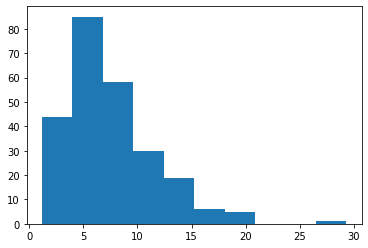

In [11]:
plt.hist(oak_west["Daily Mean PM2.5 Concentration"])

Let's play around with the `bins` argument `plt.hist()`. As the documentation for `plt.hist()` outlines, `bins` can take a bunch of different datatypes - it can be an integer, or a list of integers, or even a string. Let's try all three of these possibilities below.

(array([129.,  88.,  25.,   5.,   1.]),
 array([ 1.2 ,  6.82, 12.44, 18.06, 23.68, 29.3 ]),
 <a list of 5 Patch objects>)

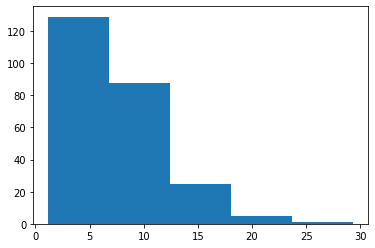

In [12]:
# setting bins to an integer
plt.hist(oak_west["Daily Mean PM2.5 Concentration"], bins = 5)

(array([ 4., 37., 59., 53., 39., 21., 15., 11.,  3.,  4.,  1.,  0.,  0.,
         0.]),
 array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
 <a list of 14 Patch objects>)

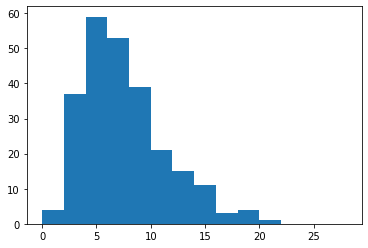

In [13]:
# setting bins to a list
bins_list = [i for i in range(0,30,2)]
plt.hist(oak_west["Daily Mean PM2.5 Concentration"], bins = bins_list)

(array([16., 48., 54., 38., 36., 20., 13., 11.,  4.,  2.,  5.,  0.,  0.,
         0.,  0.,  1.]),
 array([ 1.2    ,  2.95625,  4.7125 ,  6.46875,  8.225  ,  9.98125,
        11.7375 , 13.49375, 15.25   , 17.00625, 18.7625 , 20.51875,
        22.275  , 24.03125, 25.7875 , 27.54375, 29.3    ]),
 <a list of 16 Patch objects>)

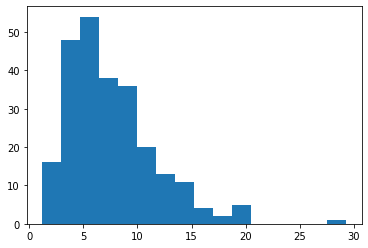

In [14]:
plt.hist(oak_west["Daily Mean PM2.5 Concentration"], bins = "sqrt")

Try playing around with the values passed to `bins = ` above. Can you explain how each approach bins the data? (the string argument is a little tricky, but it's documented in the ["Notes" section of this page](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram_bin_edges.html))

Passing an integer n to `bins = ` just creates n equally sized bins from the data. Passing a list creates bin edges at the list values. The string that we passed, "sqrt", creates equally sized bins, the number of which is equal to the square root of the number of values we're plotting.

### Question 3.3
Plot a histogram of PM2.5 concentrations for Oakland West below. 
1. Play around with different binning strategies and choose the one you like best.
2. Add axis labels and a title.

Text(0.5, 1.0, 'Distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

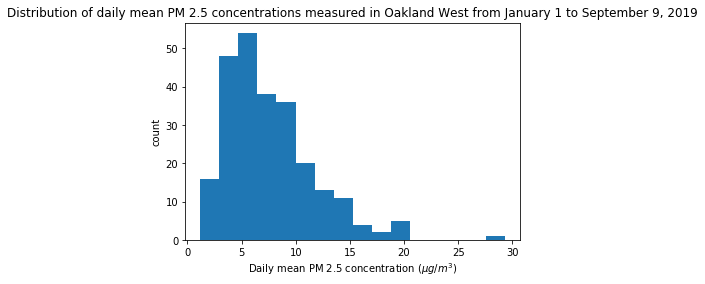

In [15]:
plt.hist(oak_west["Daily Mean PM2.5 Concentration"], bins = "sqrt")
plt.xlabel('Daily mean PM 2.5 concentration ($\mu g/m^3$)')
plt.ylabel('count')
plt.title('Distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

### Question 3.4
Why did you choose the binning strategy you did?

*YOUR ANSWER HERE*

## Question 4: Creating Kernel Density Estimate (KDE) plots
A Kernel Density Estimate (KDE) gives us a probability distribution for a continuous variable from a set of observed data points. Our histogram gives us some information about the distribution of PM2.5 in West Oakland - we can see how often we observe a PM2.5 concentration that falls within a certain bin over the first 9 months of 2019. But because histograms are binned and discretize data, the amount of information we can get about a continuous variable will always be limited by the size of the bins.<br>

To understand how to create a KDE, we have to first figure out what "kernel" means. A kernel is a weighting function and it shares certain mathematical properties with probability density functions (it always evaluates to a non-negative and real value and its integral - or the area under the curve - equals 1).  Kernels are also *even*, meaning the value they return is independent of the sign of the argument. ([source](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/)).<br>

KDE "applies" the kernel on a grid of points along the support of your data set.  Like the edges of bins in a histogram, these points need not correspond to actual observations in your data set.  They are just equally spaced points, as they were in the histogram examples above.  Now, what does it mean to "apply" the kernel to a point on the support?  Put simply, the kernel measures how many observations in the data set are close by.  The kernel returns a higher number if the point is in a crowded part of the support, and a lower value if the point is out in the wilderness.  Different kernels weight the importance of nearby observations differently.  Some give equal weight to all observations in a range, and others give more weight to observations at the center of the kernel, i.e. the point where you're evaluating the kernel.

What's nice about the construction of KDE kernels is that the collective evaluation of the kernel along all the grid points you chose on the support can be interpreted as a probability distribution.  (This is because the kernels are carefully defined in mathematical terms to ensure this resulting property.)  That is, if you plot all those kernel evaluations as a function of the points where you evaluated them and then connect those points together, the resulting curve is an estimate of the probability density function of the underlying data.  Below is an example of what a KDE might look like for ozone concetrations measured at two locations ([source](https://chemicalstatistician.wordpress.com/2013/06/09/exploratory-data-analysis-kernel-density-estimation-in-r-on-ozone-pollution-data-in-new-york-and-ozonopolis/)).<br>
<img src="images/kernel-density-plot-ozone3.png">

In practice, you would implement a KDE by choosing a kernel and then applying it at regular intervals across your dataset. The length of those intervals simply the width of your support divided by the number of points in your grid -- the *gridsize*, a parameter that you get to select. You would then add up all the probability distribution functions and divide your function by the total number of data points to normalize it - since we're producing a probability distribution, the area under the curve needs to be equal to one.<br>

(If this feels a little confusing, don't worry! We'll discuss it as a group in lab, and the next few questions will also help us understand how KDEs work).

### Question 4.1
Let's use [this tool](https://mathisonian.github.io/kde/) to help us explore KDEs. Play around with the bandwidth and kernel. What happens to the KDE curve (the blue line) when you change the bandwidth? Why? How about the shape of the kernel (the red line)?

*Your answer here*

While it's always good to understand the math behind what we're plotting or analyzing, there are thankfully functions and packages that neatly do the math for us. In the Setup cell at the very top, we imported the package `seaborn` as `sns`. [`seaborn`](https://seaborn.pydata.org/) is a data visualization library that builds on `matplotlib`, and it contains convenient functions for a range of plot types, including KDE plots.

Let's start by running the cell below to pull the documentation for [`kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html).

In [16]:
sns.kdeplot?

### Question 4.2  
From the documentation and from what you know about KDE plots, which argument(s) would you play with to change how the final KDE curve looks?

The `kernel`, `gridsize` and `bandwidth` arguments change how the final KDE curve looks, with the `gridsize` being used to adjust the number of points you use.  `bandwidth` influences the width of the kernel.

### Question 4.3
Let's draw a KDE plot using `sns.kdeplot()` of PM2.5 concentrations in Oakland West. In the cell below, we're just passing our data to the function, and using default values for all other arguments. Run the cell to see what the plot looks like.

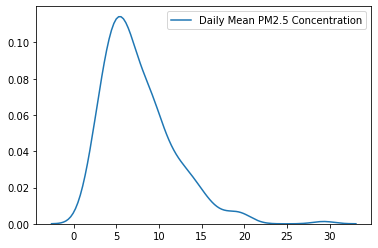

In [17]:
# run this cell
sns.kdeplot(oak_west["Daily Mean PM2.5 Concentration"])

Try plotting the KDE plot with different gridsize and bandwidth parameters. How does changing the bandwidth parameter impact the plot? Show at least two examples with different bandwidths, and add axis labels and titles for each.

Text(0.5, 1.0, 'Probability distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

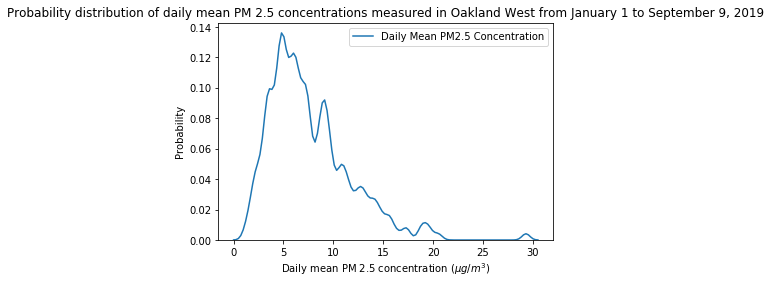

In [18]:
sns.kdeplot(oak_west["Daily Mean PM2.5 Concentration"], bw = 0.4)
plt.xlabel('Daily mean PM 2.5 concentration ($\mu g/m^3$)')
plt.ylabel('Probability')
plt.title('Probability distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

Text(0.5, 1.0, 'Probability distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

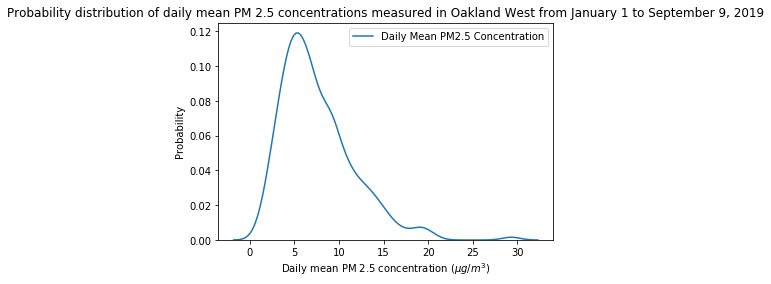

In [19]:
sns.kdeplot(oak_west["Daily Mean PM2.5 Concentration"], bw = 1)
plt.xlabel('Daily mean PM 2.5 concentration ($\mu g/m^3$)')
plt.ylabel('Probability')
plt.title('Probability distribution of daily mean PM 2.5 concentrations measured in Oakland West from January 1 to September 9, 2019')

Increasing the bandwidth leads to a smoother curve.  But if it's too big it washes out all detail.  

### Question 4.4
Grab the data from Livermore by creating a dataframe that contains just the columns "Date" and "Daily Mean PM2.5 Concentration" for Livermore from `alameda_pm25`, and save it to dataframe `livermore`.

Plot the KDE for Livermore on the same plot as West Oakland. Make sure to add a legend labelling the two locations, as well as axis labels and a title.

You can plot multiple curves on the same plot by calling the `sns.kdeplot()` function twice, i.e.:
```python
sns.kdeplot(...) # plot dataset 1
sns.kdeplot(...) # plot dataset 2
```

You can add a legend by passing a list to the plt.legend() command, i.e.:
``` python
plt.legend(["data label 1", "data label 2"])
```

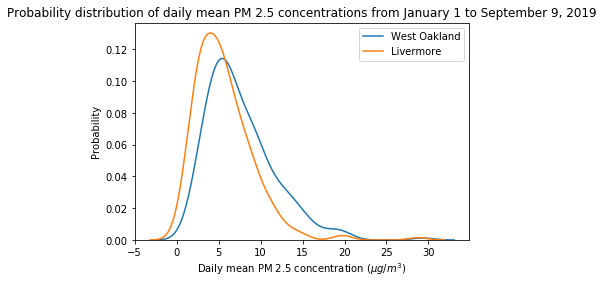

In [20]:
livermore = alameda_pm25.loc[alameda_pm25["Site Name"] == "Livermore", ["Date", "Daily Mean PM2.5 Concentration"]]

sns.kdeplot(oak_west["Daily Mean PM2.5 Concentration"])
sns.kdeplot(livermore["Daily Mean PM2.5 Concentration"])
plt.xlabel('Daily mean PM 2.5 concentration ($\mu g/m^3$)')
plt.ylabel('Probability')
plt.title('Probability distribution of daily mean PM 2.5 concentrations from January 1 to September 9, 2019')
plt.legend(["West Oakland", "Livermore"])

## Question 5: Box and Whisker Plots
We've tried two different ways to visualize distributions: histograms and probability density functions using Kernel Density Estimates. Another way to show a distribution is a box and whisker plot. It's a much more summarized version of your distribution. The general format of a box and whisker plot is shown below ([source](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_SummarizingData/BS704_SummarizingData8.html)).<br>

<img src = "images/BoxWhisker1.png" width=600>

The "box" shows the bounds of your 25th and 75th percentile (also called the 1st and 3rd quartiles, or the interquartile range (IQR)). Basically, if you ordered your data and then divided it into four bins of equal size, your box would encompass the middle two bins. <br>

The location of the whiskers can vary, but they're intended to show the full range of the data. In Seaborn, the [`sns.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function has a parameter called "whis". By default, "whis" is equal to 1.5.  This positions the whiskers at 1.5 times the distance from the median to the 25th and 75th percentiles. In this case we say the whiskers span 1.5 times the "interquartile range."  Many scientific papers use this default.  You can also set `whis = [lo hi]` where `lo` and `hi` are numbers between zero and 100 and represent the position of the whiskers by percentile of the distribution. (For example, `whis = [5, 95]` would position the whiskers at the 5th and 95th percentiles).  <br>

We're going to create a box and whisker plot that shows the distribution of PM2.5 values in two locations: Oakland West and Livermore. In order to plot box and whisker plots with multiple categories of data (in this case, multiple site locations), we need each category to have the same length. In our case, `oak_west` contains 2 less observations than `livermore` - you can confirm this using the `.shape` method. To standardize the size, we're going to use `pd.merge()` to combine `oak_west` and `livermore`.

### Question 5.1 
What kind of merge (inner, outer, right, or left) should we do so that we retain all of the data in both `oak_west` and `livermore`? If you're not sure, consult the lab 3 notebook.

We want to do an outer merge, which will keep all of the data from both dataframes.

### Question 5.2 
Merge `oak_west` and `livermore` on the "Date" field, and save the merged dataframe to `pm25_merged`. Rename the columns to something more descriptive (i.e. a column name that includes the site name).

In [21]:
pm25_merged = pd.merge(oak_west, livermore, how = 'outer', on = "Date")
pm25_merged.rename(columns = {"Daily Mean PM2.5 Concentration_x":"Oakland West Daily Mean PM2.5",
                              "Daily Mean PM2.5 Concentration_y":"Livermore Daily Mean PM2.5"}, inplace = True)

In [22]:
pm25_merged.head()

,Date,Oakland West Daily Mean PM2.5,Livermore Daily Mean PM2.5
0,2019-01-01,6.2,5.7
1,2019-01-02,9.7,11.9
2,2019-01-03,19.6,20.1
3,2019-01-04,29.3,28.8
4,2019-01-05,3.5,11.2


### Question 5.3
Let's start by running the cell below to plot a basic boxplot using default parameters.

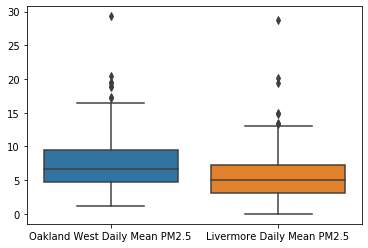

In [23]:
sns.boxplot(data = pm25_merged.iloc[:,1:])

Let's try using seaborn's syntax for creating and formatting plots. While you can use matplotlib syntax with seaborn, as we did with the KDE plots, seaborn has its own function - [`seaborn.set`](https://seaborn.pydata.org/generated/seaborn.set.html) - that's used for customizing aesthetics. 

[Text(0, 0.5, 'Daily mean PM 2.5 concentration ($\\mu g/m^3$)'),
 Text(0.5, 0, 'Measurement location')]

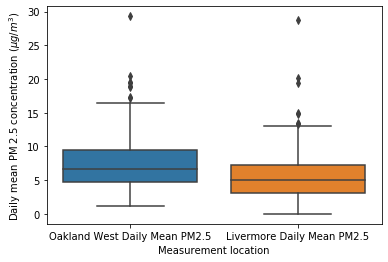

In [24]:
fig = sns.boxplot(data = pm25_merged.iloc[:,1:])

fig.set(
    xlabel = 'Measurement location', 
    ylabel = 'Daily mean PM 2.5 concentration ($\mu g/m^3$)'
)

Now, using the code in the previous cell as a starting point, change the orientation of the plot from vertical to horizontal (hint: check the `sns.boxplot` documentation) and adding a title.

[Text(0, 0.5, 'Measurement location'),
 Text(0.5, 0, 'Daily mean PM 2.5 concentration ($\\mu g/m^3$)'),
 Text(0.5, 1.0, 'Daily mean PM2.5 distribution from January 1 to September 9 2019')]

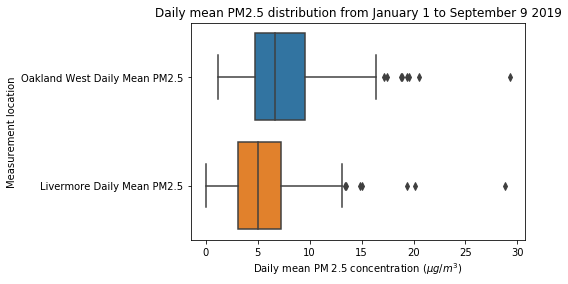

In [25]:
fig = sns.boxplot(
    data = pm25_merged.iloc[:,1:],
    orient = "h"
)

fig.set(
    ylabel = 'Measurement location', 
    xlabel = 'Daily mean PM 2.5 concentration ($\mu g/m^3$)',
    title = "Daily mean PM2.5 distribution from January 1 to September 9 2019"
)

### Question 5.4
Play around with the boxplot parameters - at minimum, try changing the whiskers "whis" parameter in the boxplots. Plot one of your favorite graphs below, and explain how the changes you made might change how the viewer interprets the data.

In [26]:
# your code here

*Your answer here*

## Question 6: Line graphs
Let's plot PM2.5 concentrations throughout 2019 to date by creating a line graph with date on the x-axis, and PM2.5 concentration on the y-axis, for all sites. We'll start by just calling the `plt.plot()` function with the x and y data as arguments, using default parameters otherwise.<br>

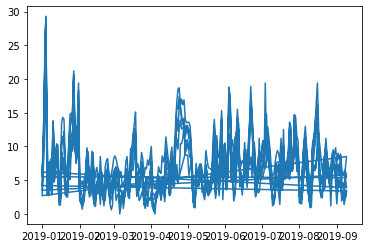

In [27]:
# run this cell
plt.plot(alameda_pm25["Date"], alameda_pm25["Daily Mean PM2.5 Concentration"])

This plot is a little confusing! The date labels are crowding each other on the x-axis, and it's hard to identify trends since there are so many lines. We also have back and forth lines because matplotlib is plotting all of the different sites at once, so it's joining data from one site in September 2019 to data from another site in January 2019.<br> 

Let's try assigning colors to the different locations. There are a lot of ways to do this - one method, of looping through all your categories and plotting them in layers, is shown below.<br>

We can start by using a pre-defined color palette from one of [`seaborn`'s color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html) (note that this is the only `seaborn` feature we're using in the line plot code - otherwise, we're just using `matplotlib` syntax). I'm going to choose "colorblind", but you can feel free to change the palette. If we use the `sns.color_palette` method, we can see that "colorblind" is a list of RGB color values. We can assign this color palette to the variable `color`.

In [28]:
palette = "colorblind" # you can try changing this to another pre-set palette
sns.color_palette(palette)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [29]:
color = sns.color_palette(palette)

In the cell below, we're going to loop through the unique site names in the full Alameda county dataset, and plot each dataframe subset separately, assigning a color for each from the list of colors provied in the seaborn color palette.

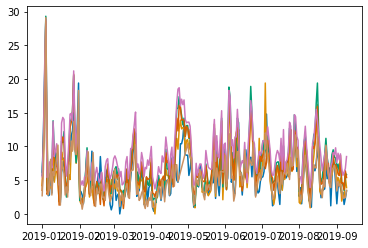

In [30]:
# run this cell
sites = list(alameda_pm25["Site Name"].unique())
for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    plt.plot(site_df["Date"], site_df["Daily Mean PM2.5 Concentration"], 
             color = color[sites.index(name)])

That's a bit better - we can see that we've plotted different colors for the different sites now. Let's make the plot bigger and add a legend. To do that, we're going to change our syntax slightly from previous examples. We'll create a new figure by calling `plt.figure()`, to which we can pass an argument for `figsize` that specifies the size of the figure.<br> 

A figure in `matplotlib` can include subplots - by convention, these are often given a variable name `ax`. We only need one plot in our figure, so when we call the function [`fig.addsubplot()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot), we can just use default arguments (check the function documentation for information on how you can add multiple subplots).<br>

Now, instead of using `plt.plot()`, we're going to use `ax.plot()` since `ax` is the variable that represents our plot within the figure `fig`.<br>

After we've plotted all of the lines, we can add axis labels, a legend, and a title by using the respective methods on `ax`.

Text(0.5, 1.0, 'Daily mean PM2.5 concentrations in Alameda County, 2019')

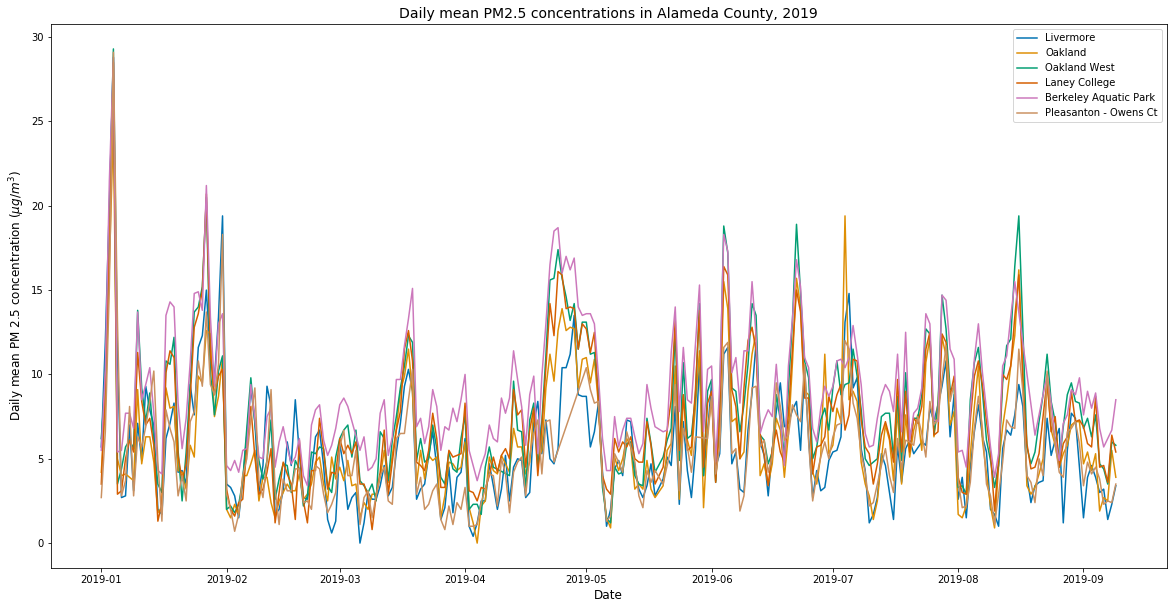

In [31]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    ax.plot(site_df["Date"], site_df["Daily Mean PM2.5 Concentration"], color = color[sites.index(name)])

ax.legend(sites)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Daily mean PM 2.5 concentration ($\mu g/m^3$)", fontsize = 12)
ax.set_title("Daily mean PM2.5 concentrations in Alameda County, 2019", fontsize = 14)

The plot above is still pretty busy! Try outputting a line plot where the data points for just "Berkeley Aquatic Park" are highlighted in a different color than the rest (eg. Berkeley Aquatic Park in green, everything else in grey). Use the code in the cell above as a starting point. Make any other tweaks that you think make the plot look better. Do you notice anything about the measurements at Berkeley Aquatic Park compared to the other sites?

Text(0.5, 1.0, 'Daily mean PM2.5 concentrations in Alameda County, 2019')

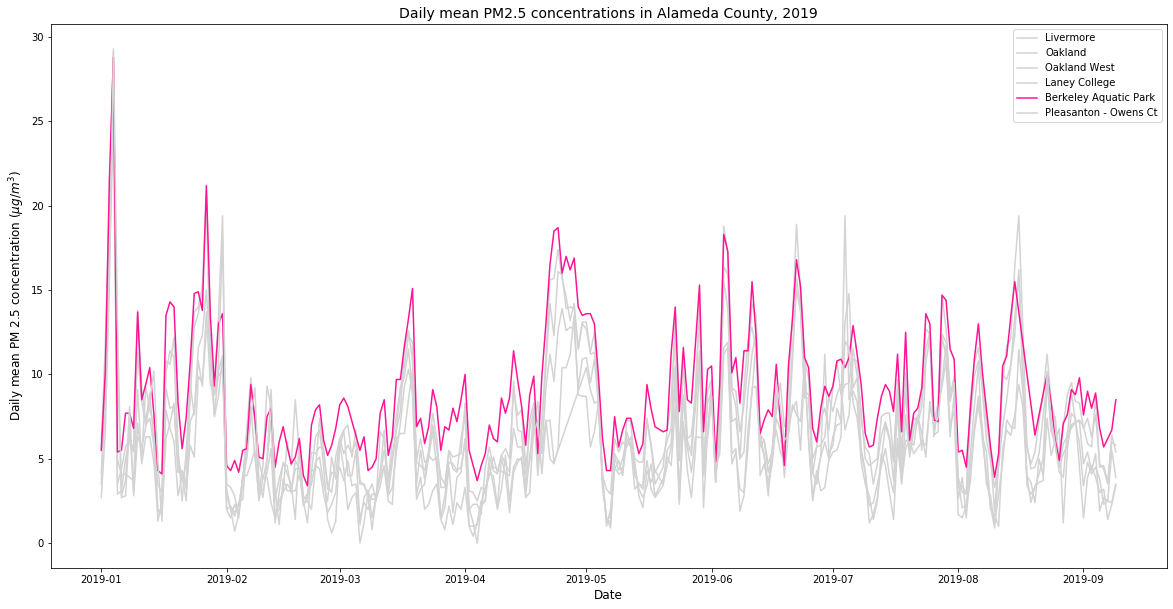

In [32]:
highlighted_site = "Berkeley Aquatic Park"

fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot()

for name in sites:
    site_df = alameda_pm25[alameda_pm25["Site Name"] == name]
    if name == highlighted_site:
        ax.plot(site_df["Date"], site_df["Daily Mean PM2.5 Concentration"], color = 'deeppink')
    else:
        ax.plot(site_df["Date"], site_df["Daily Mean PM2.5 Concentration"], color = 'lightgray')

ax.legend(sites)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Daily mean PM 2.5 concentration ($\mu g/m^3$)", fontsize = 12)
ax.set_title("Daily mean PM2.5 concentrations in Alameda County, 2019", fontsize = 14)

Berkeley Aquatic Park follows the same general trend as the other sites for PM2.5 concentration over time, although it usually does seem to be on the higher end of mean daily PM2.5 concentrations.

# Hooray, you're done! 

Please remember to submit your lab work, after clicking Kernel -> Restart & Run All, in .html and .ipynb format on bCourses.